In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from utils import load_config
import matplotlib.patches as mpatches
from plots import *
from agents import *

/Users/sumana.basu/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(
/Users/sumana.basu/Library/Python/3.9/lib/python/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
config = config = load_config()

In [4]:
os.environ["litellm_key"]="sk-EtvD1bxoKo1pMumd_EwIUg"

### Plot preference by category

In [16]:
# def plot_preference_dist(df, category, dataset_name):
#     # 1. Identify columns ending with "_PREFERENCE"
#     preference_cols = [col for col in df.columns if col.endswith("_PREFERENCE")]

#     # 2. Collect all unique categories across these preference columns
#     all_categories = set()
#     for col in preference_cols:
#         all_categories.update(df[col].dropna().unique())

#     # 3. Create a pastel color palette and map each category to a color.
#     palette = sns.color_palette("pastel", n_colors=len(all_categories))
#     # Sort categories for consistency.
#     sorted_categories = sorted(all_categories, key=lambda x: str(x))
#     cat_to_color = dict(zip(sorted_categories, palette))

#     # 4. Create a figure with 1 row and 3 columns of subplots.
#     fig, axes = plt.subplots(1, 3, figsize=(15, 5))

#     # 5. Plot each pie chart with the column name as the subplot title.
#     for i, col in enumerate(preference_cols):
#         # Get value counts for each category (including NaN if needed)
#         value_counts = df[col].value_counts(dropna=False)
#         # Sort categories to maintain consistency.
#         categories = sorted(value_counts.index, key=lambda x: str(x))
#         slice_colors = [cat_to_color[cat] for cat in categories]
        
#         axes[i].pie(
#             value_counts.loc[categories],
#             autopct='%1.1f%%',
#             textprops={'fontsize': 10},
#             startangle=140,
#             colors=slice_colors,
#             labels=None  # Do not display individual labels on the pie slices.
#         )
#         subtitle = col.split('_')[0].split('/')[1]
#         axes[i].set_title(subtitle, fontsize=14)  # Set the subplot title as the column name.
#         axes[i].axis('equal')  # Ensures the pie is drawn as a circle.

#     # 6. Create a common legend using patches.
#     patches = [mpatches.Patch(color=cat_to_color[cat], label=str(cat)) for cat in sorted_categories]
#     # Place the legend at the bottom center of the figure.
#     fig.legend(handles=patches, loc='lower center', ncol=len(patches), frameon=False, fontsize=14)

#     # 7. Add a common title for the entire figure.
#     fig.suptitle(f"Preferences Distriution of different LLMs as Judges - {dataset_name} ({category})", fontsize=16)

#     plt.tight_layout(rect=[0, 0.1, 1, 0.95])
#     fig.savefig(f'results/plots/{dataset_name}_{category}.png')
#     plt.show()
#     plt.close(fig)

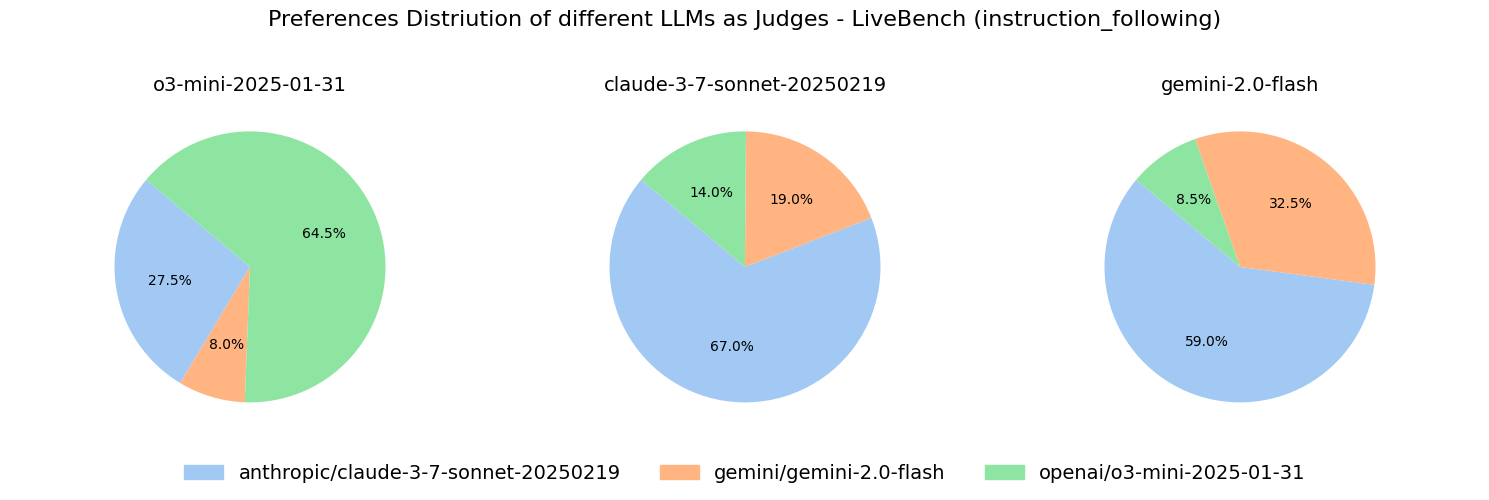

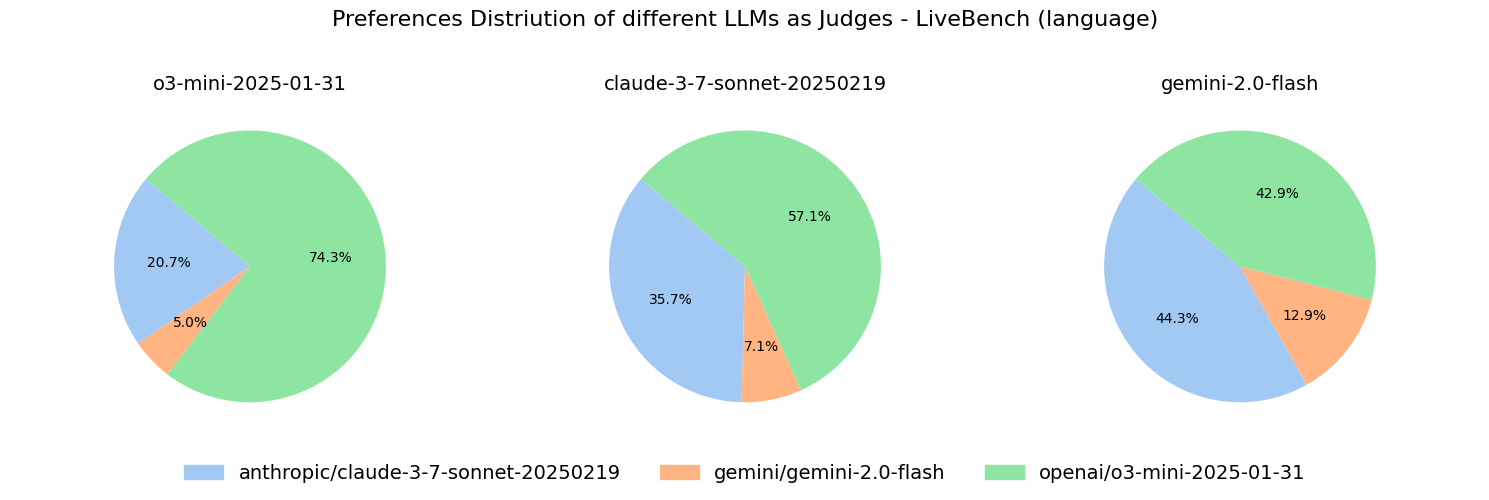

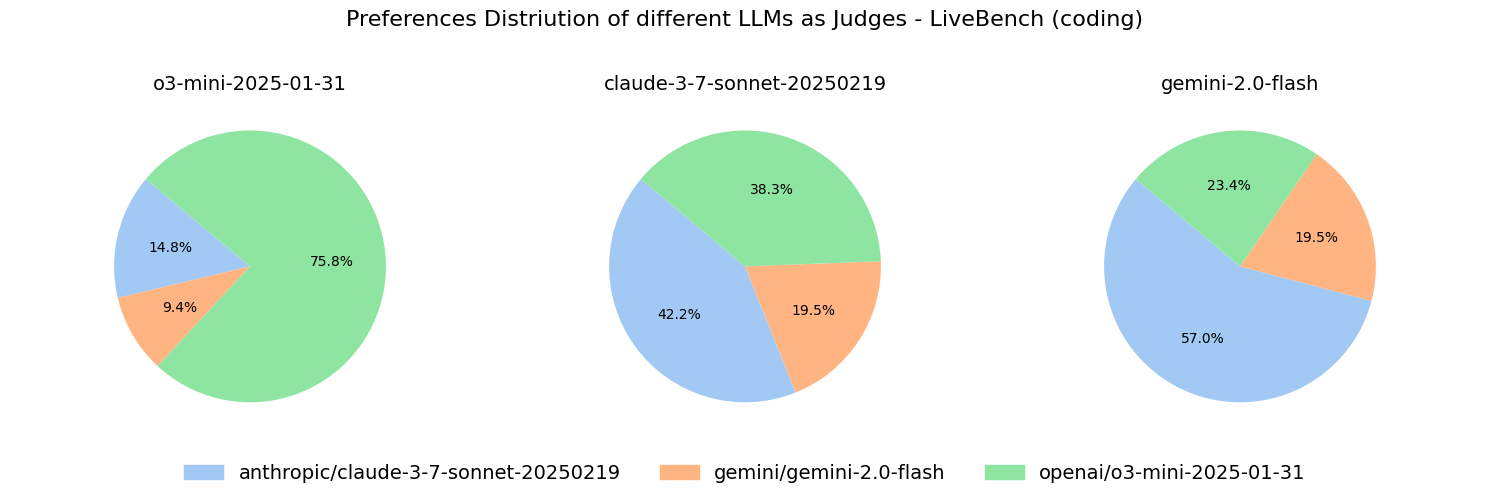

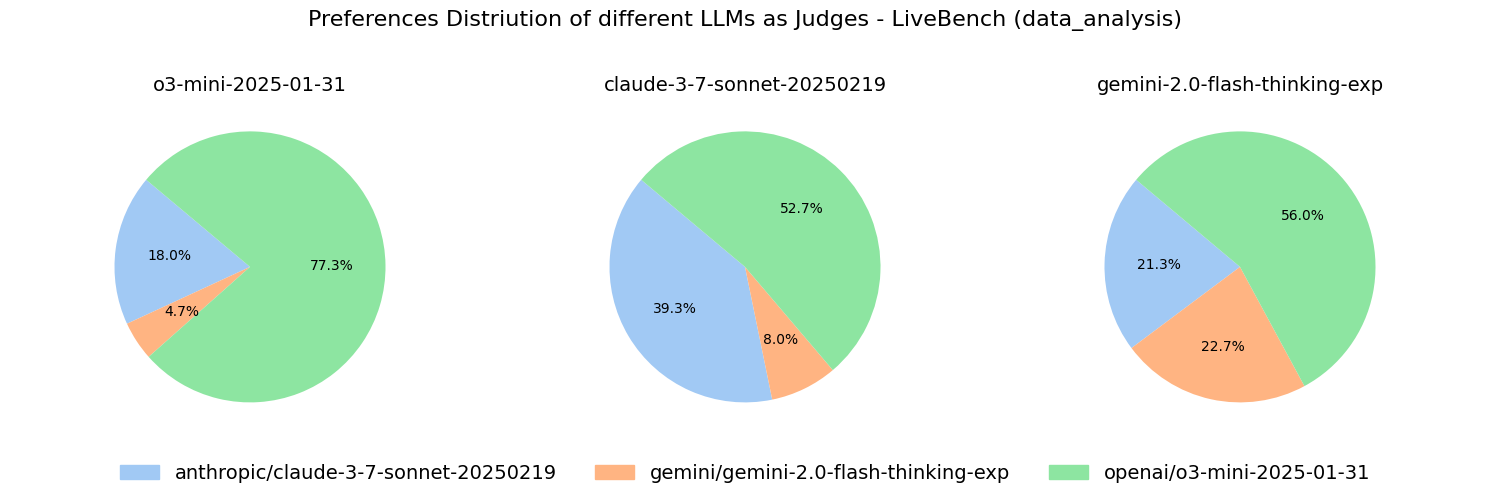

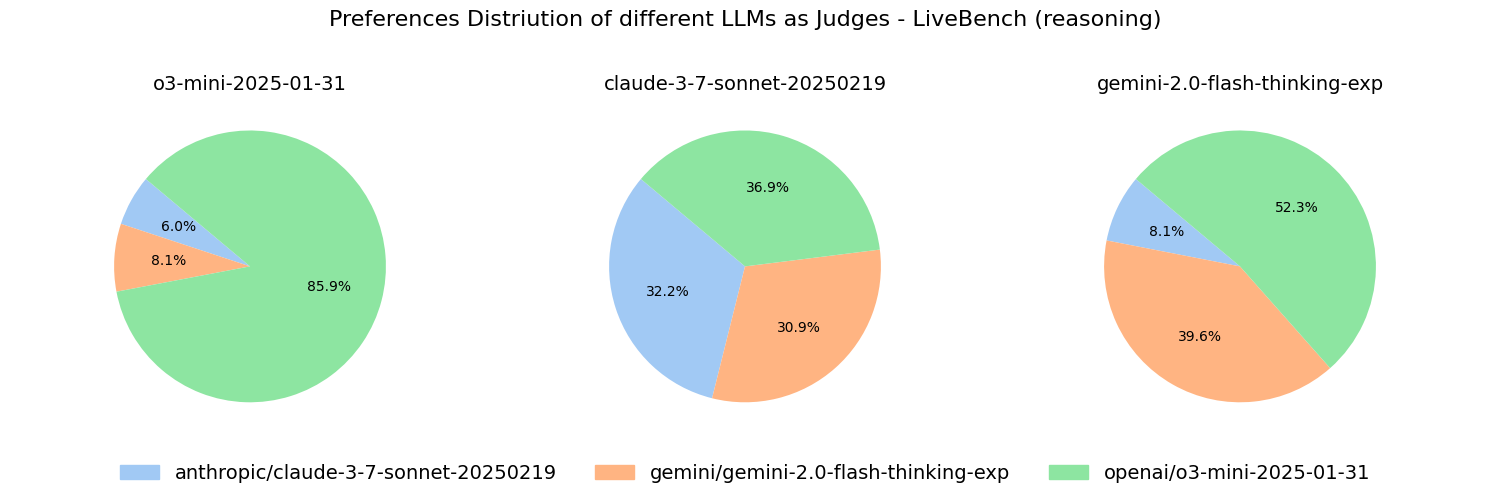

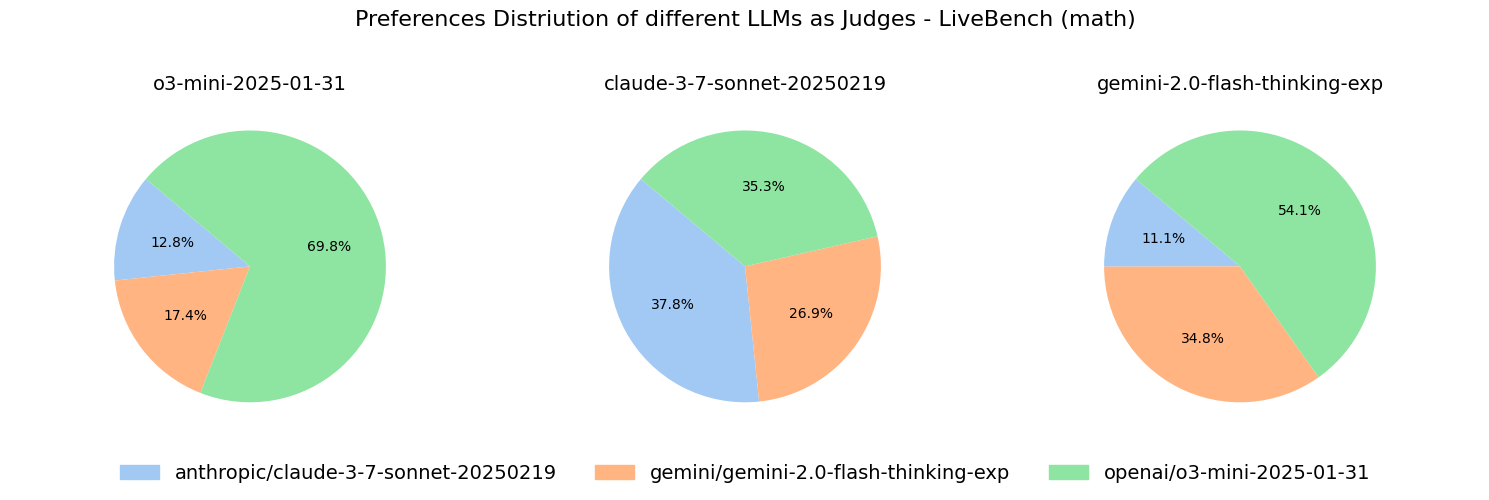

In [17]:
for category in config["livebench"].keys():
    file_path = config["livebench"][category]["judgement_path"]
    df = df = pd.read_csv(file_path)
    plot_preference_dist(df, category, dataset_name="LiveBench")

### Plot preference by tasks per category

In [126]:
# def plot_pref_dist_per_task(df, category, dataset_name):
#     # Assume df is your DataFrame and it contains a "task" column and some "_PREFERENCE" columns.
#     # Identify all columns ending with "_PREFERENCE"
#     pref_cols = [col for col in df.columns if col.endswith("_PREFERENCE")]

#     # 1. Collect all unique categories across these preference columns (global color mapping)
#     all_categories = set()
#     for col in pref_cols:
#         all_categories.update(df[col].dropna().unique())
#     sorted_categories = sorted(all_categories, key=lambda x: str(x))
#     palette = sns.color_palette("pastel", n_colors=len(sorted_categories))
#     cat_to_color = dict(zip(sorted_categories, palette))

#     # 2. Get all unique tasks
#     tasks = df['task'].unique()

#     # 3. For each task, plot a figure with side-by-side pie charts for each preference column
#     for t in tasks:
#         task_df = df[df['task'] == t]
#         num_plots = len(pref_cols)
        
#         fig, axes = plt.subplots(1, num_plots, figsize=(5 * num_plots, 5))
        
#         # If there's only one subplot, convert axes to a list for uniform handling.
#         if num_plots == 1:
#             axes = [axes]
        
#         # For each preference column, plot a pie chart for this task.
#         for i, col in enumerate(pref_cols):
#             # Get counts for each category in this column for the current task.
#             value_counts = task_df[col].value_counts(dropna=False)
#             # Sort the categories for consistency
#             categories = sorted(value_counts.index, key=lambda x: str(x))
#             slice_colors = [cat_to_color[cat] for cat in categories]
            
#             axes[i].pie(
#                 value_counts.loc[categories],
#                 autopct='%1.1f%%',
#                 startangle=140,
#                 colors=slice_colors,
#                 labels=None  # Omit labels on the pie slices
#             )
#             axes[i].set_title(col)  # Use the preference column name as the subplot title
#             axes[i].axis('equal')  # Ensures the pie is drawn as a circle.
        
#         # Create a common legend for all subplots in this figure.
#         patches = [mpatches.Patch(color=cat_to_color[cat], label=str(cat)) for cat in sorted_categories]
#         fig.legend(handles=patches, loc='lower center', ncol=len(patches), frameon=False)
        
#         # Add a common title indicating the current task.
#         fig.suptitle(f"Preference Distribution for Task: {t}", fontsize=16)
        
#         plt.tight_layout(rect=[0, 0.1, 1, 0.95])
#         fig.savefig(f'results/plots/{dataset_name}_{category}_{t}.png')
#         plt.show()

category: instruction_following ['summarize' 'story_generation' 'paraphrase' 'simplify']


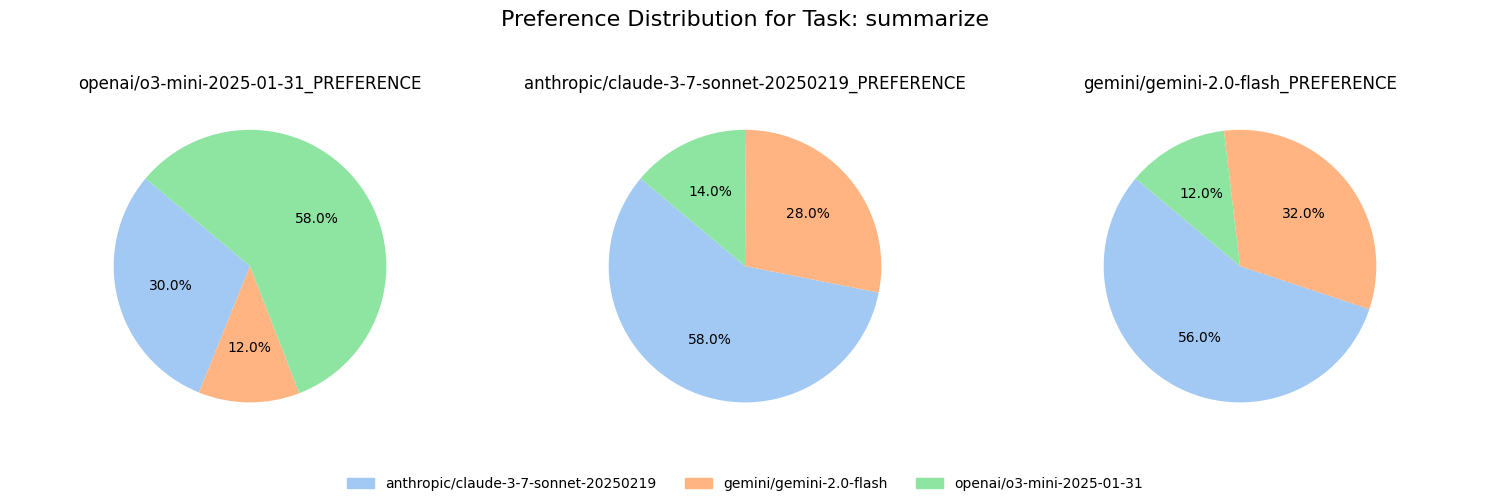

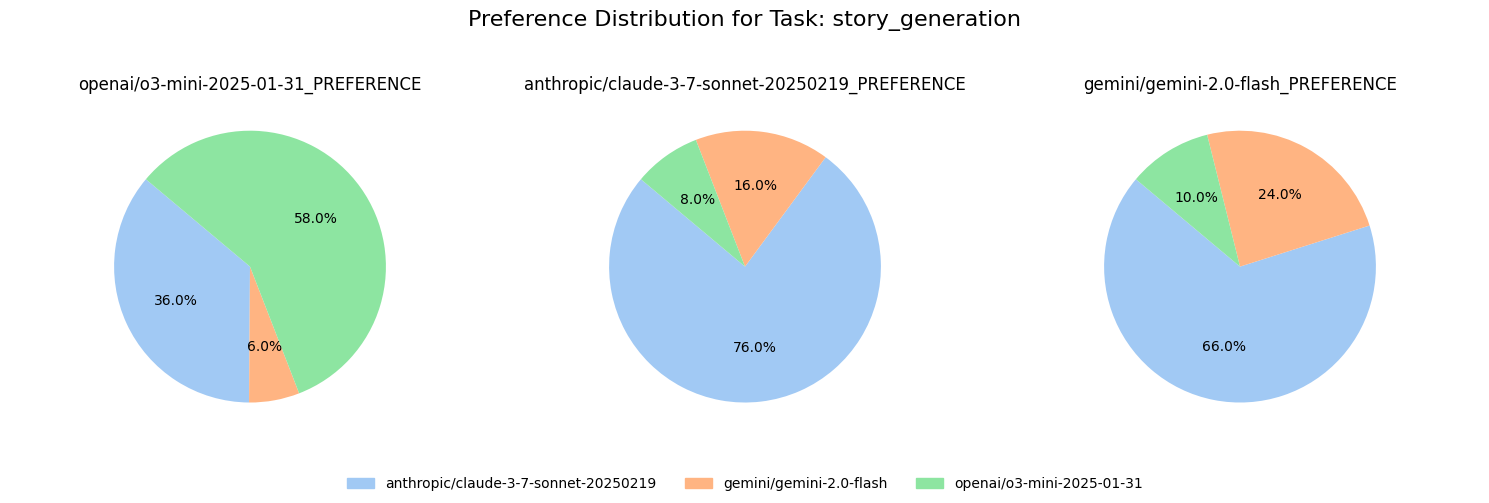

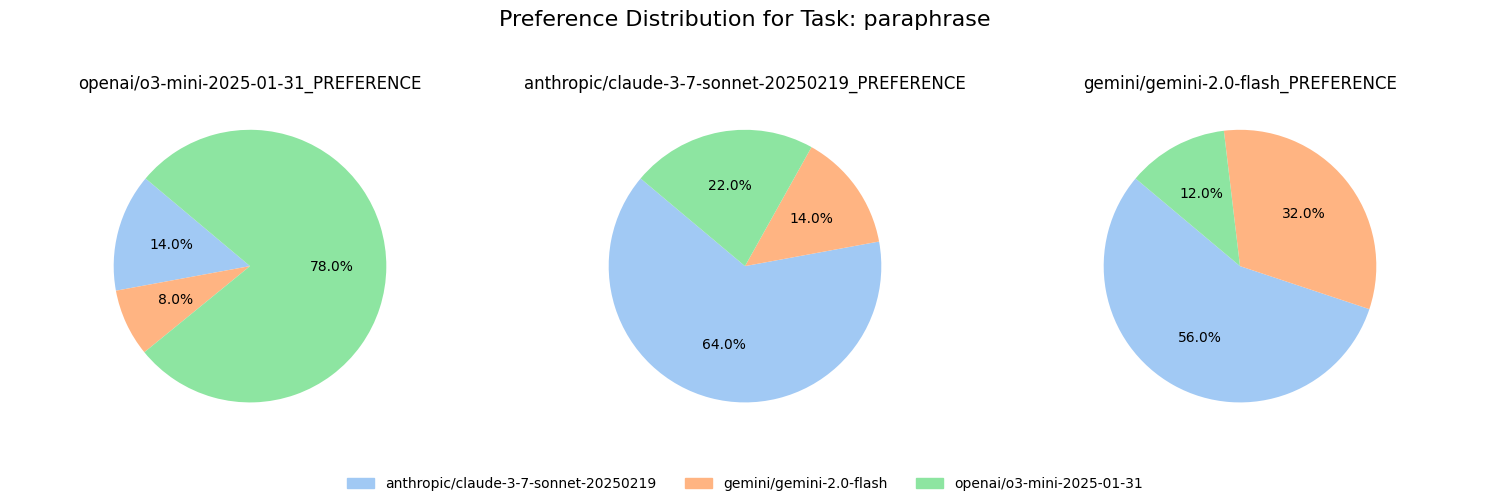

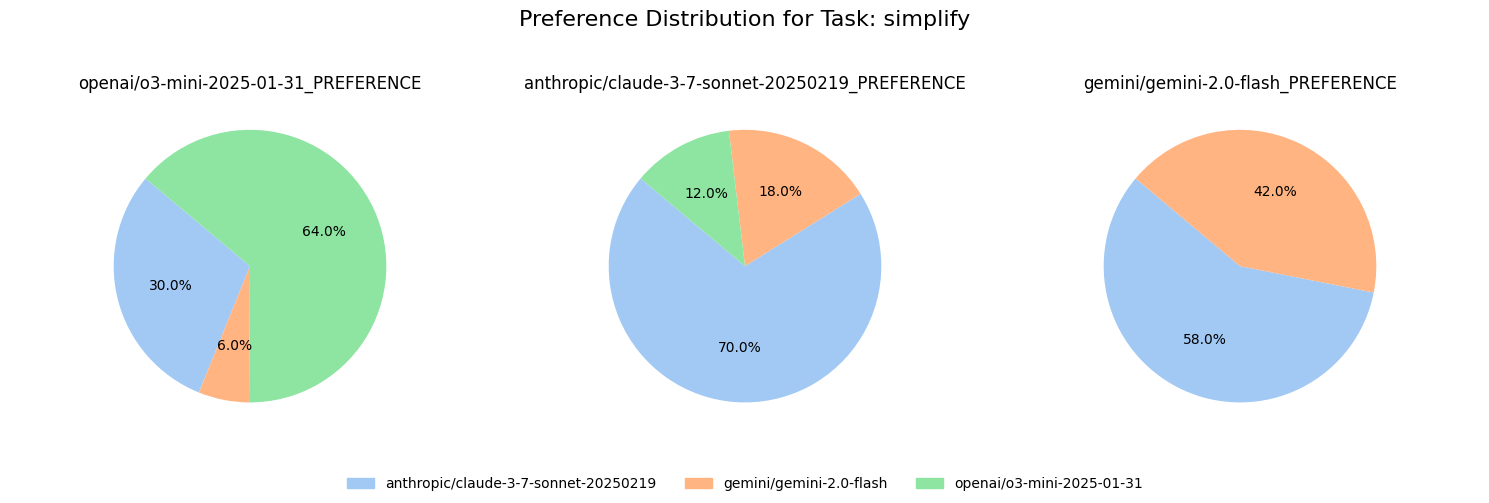

category: language ['typos' 'plot_unscrambling' 'connections']


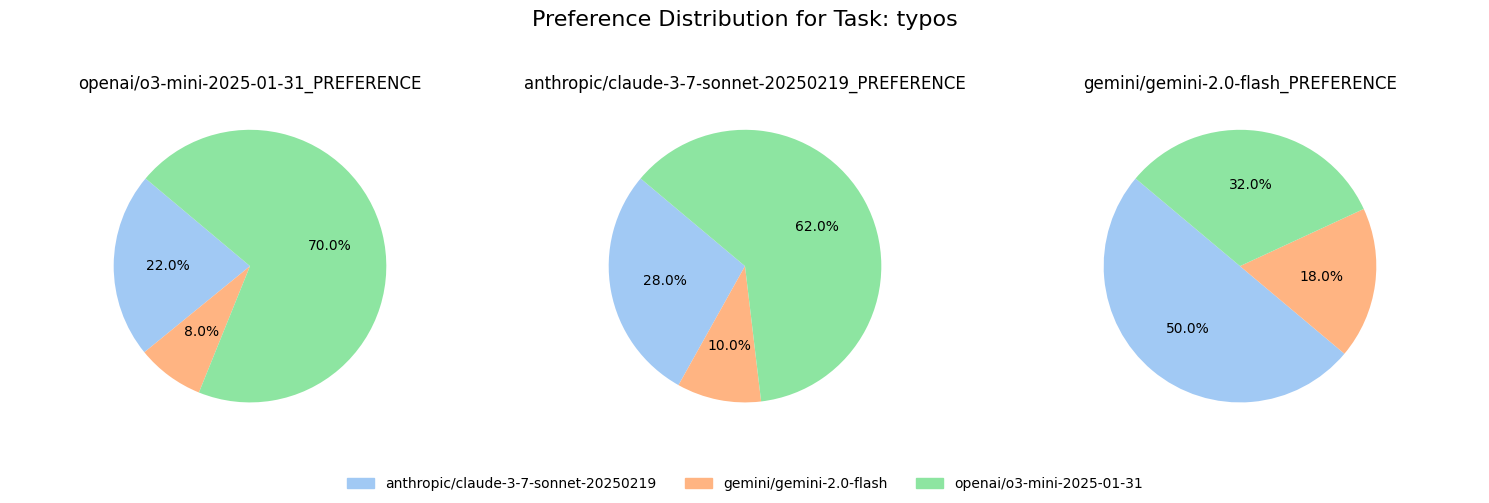

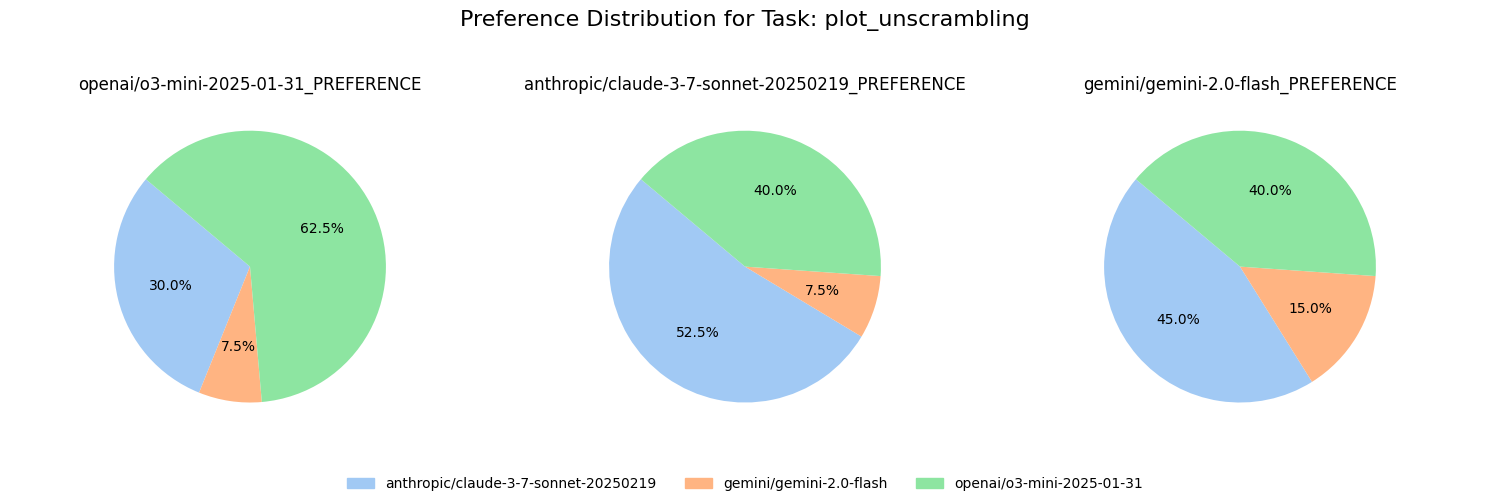

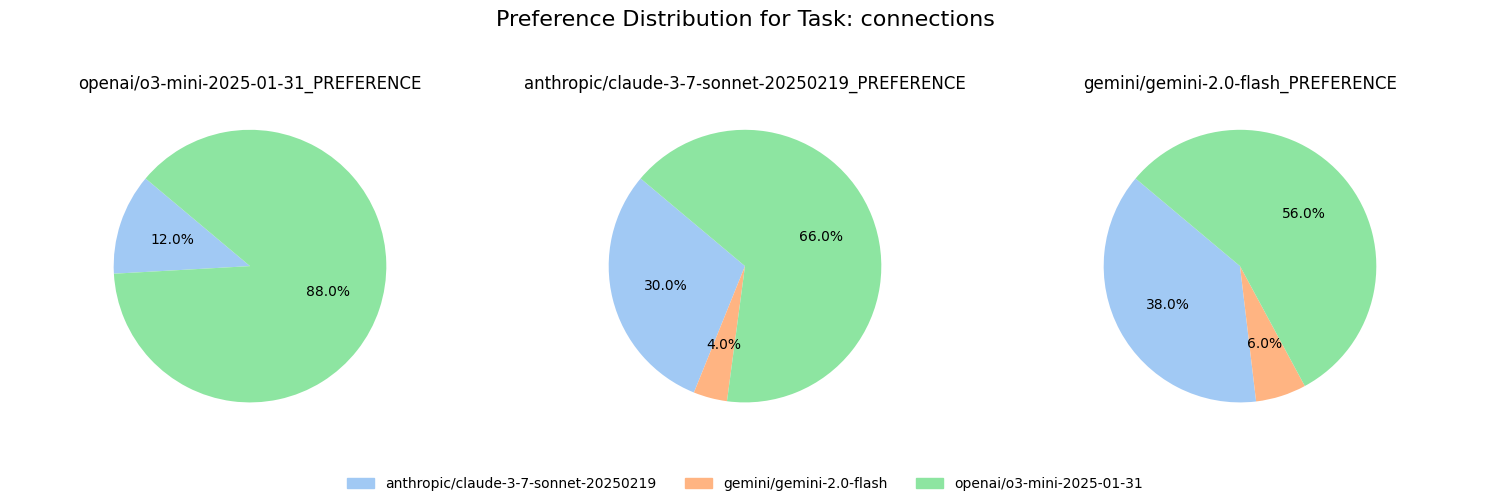

category: coding ['LCB_generation' 'coding_completion']


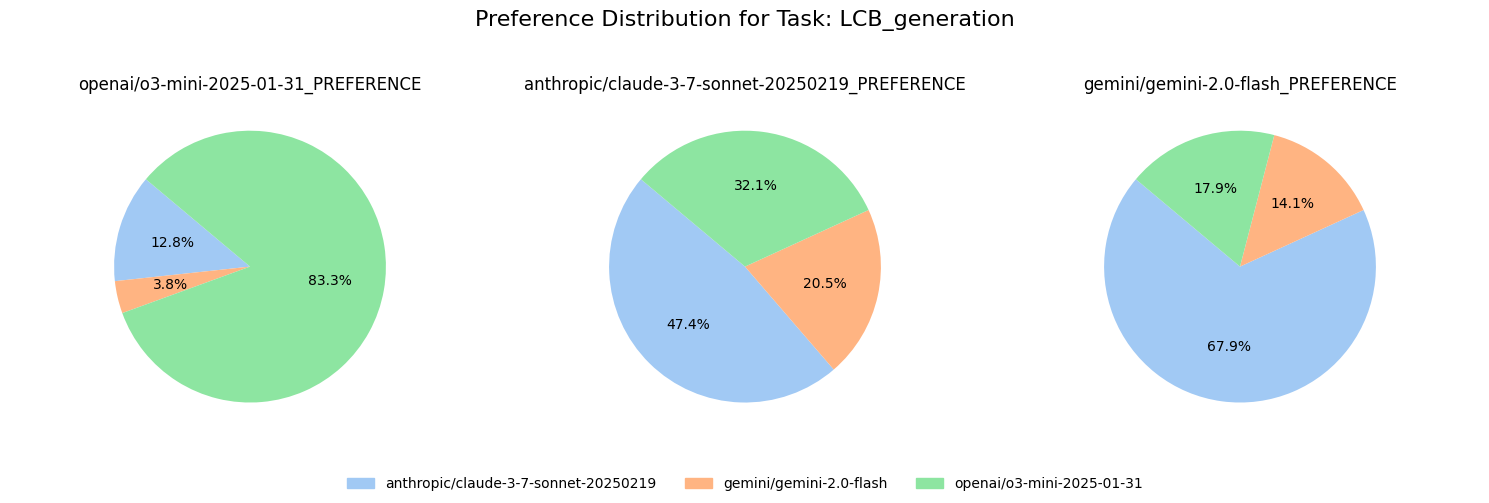

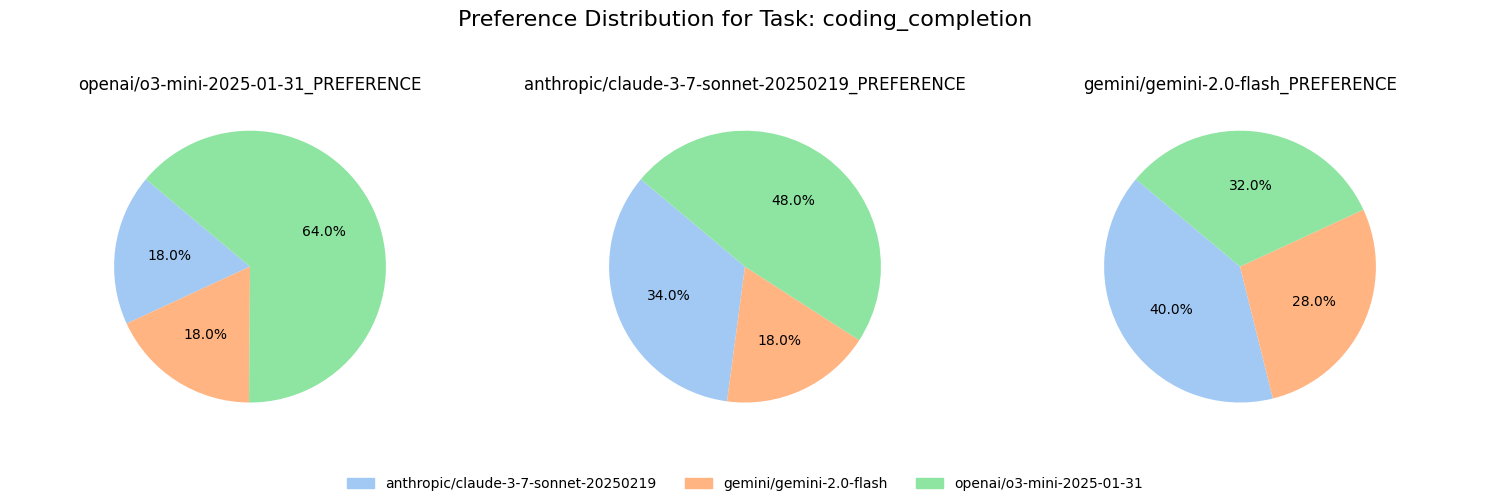

category: data_analysis ['tablereformat' 'tablejoin' 'cta']


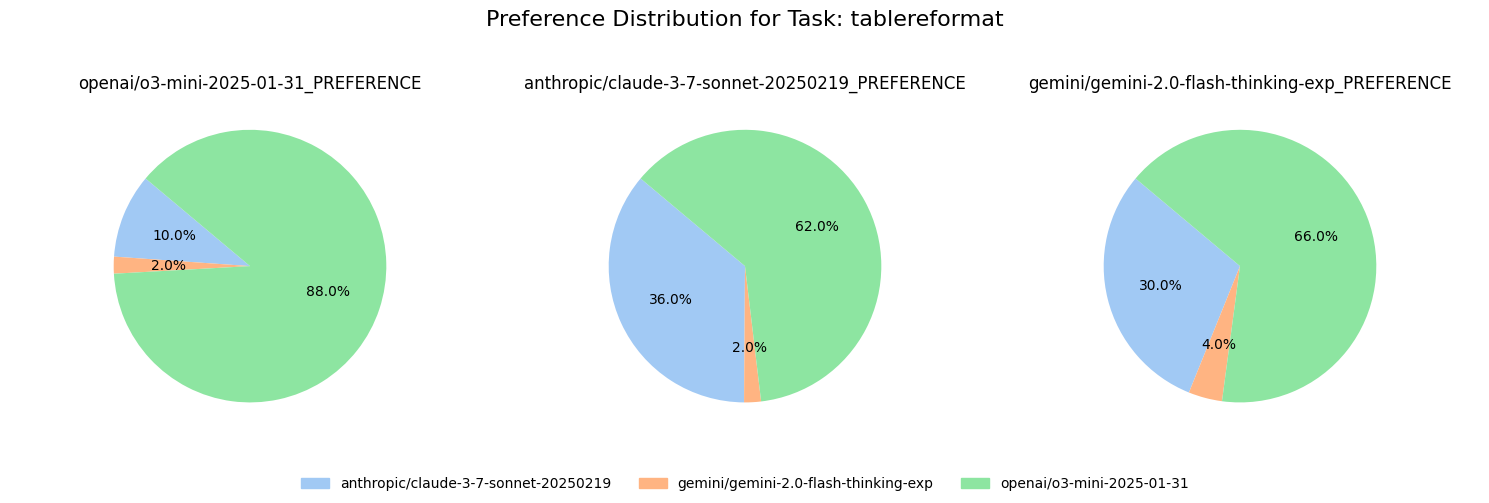

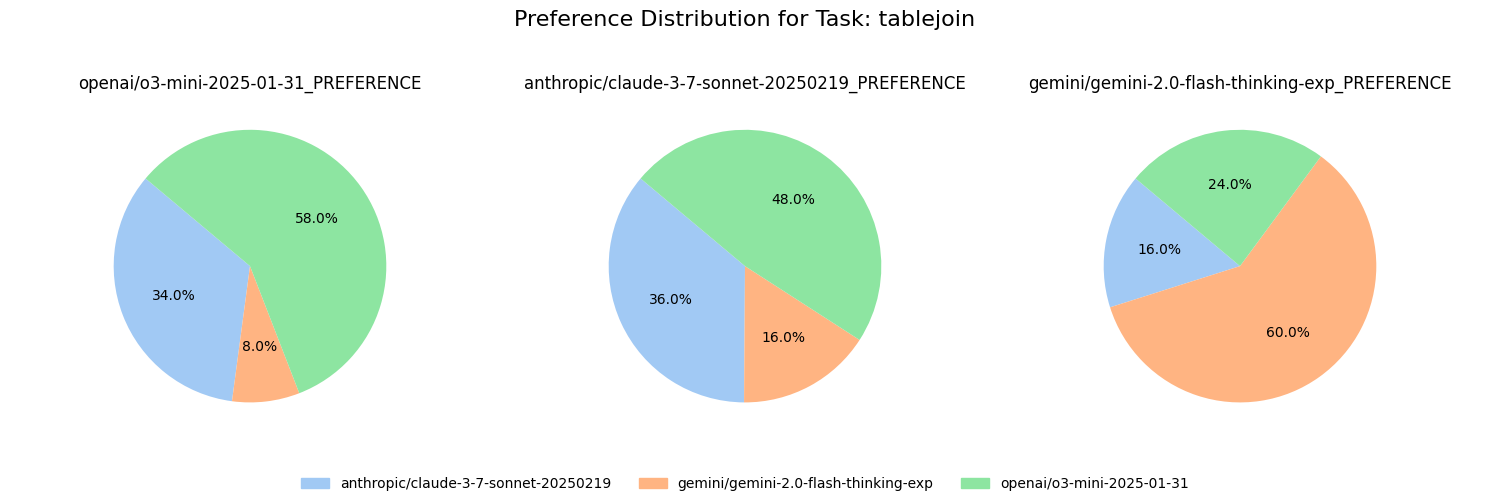

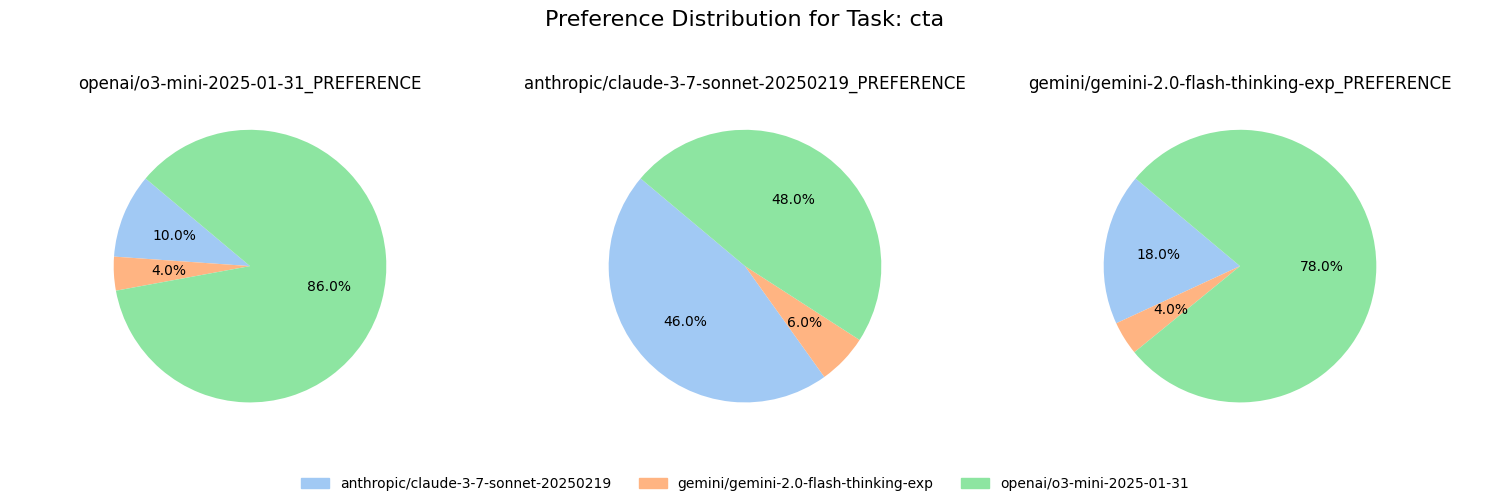

category: reasoning ['web_of_lies_v2' 'zebra_puzzle' 'spatial']


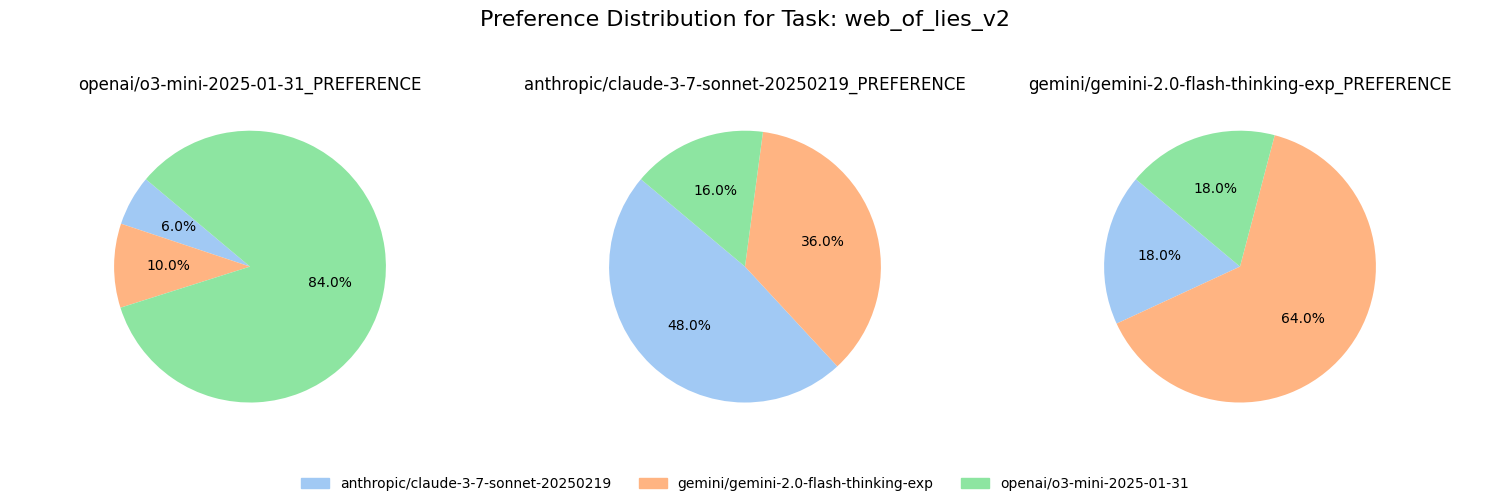

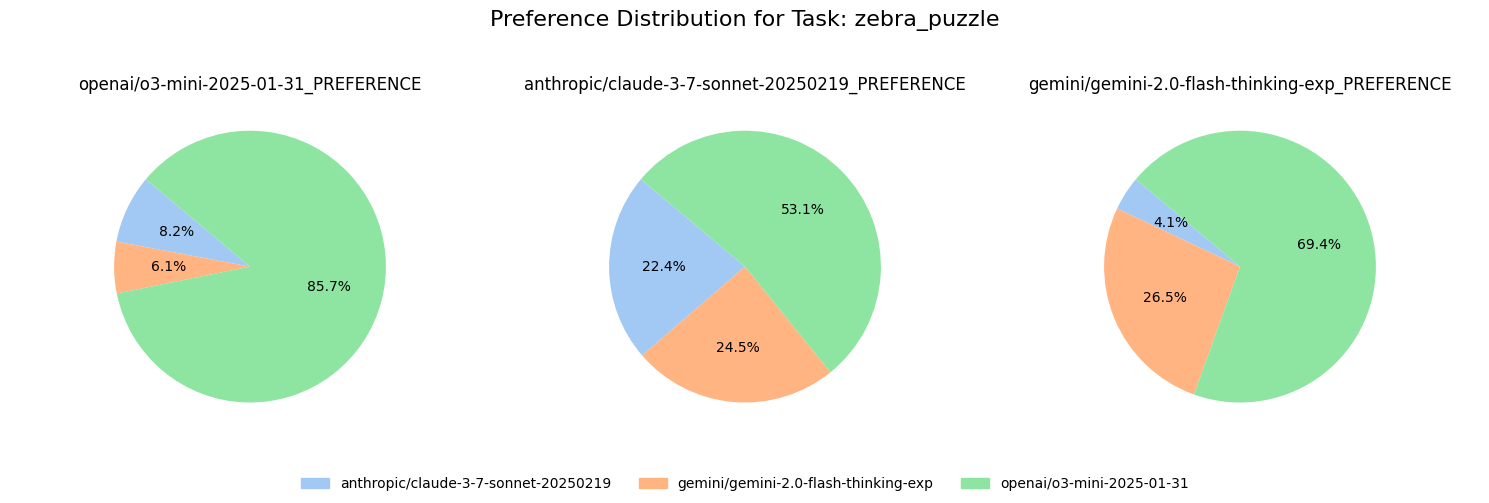

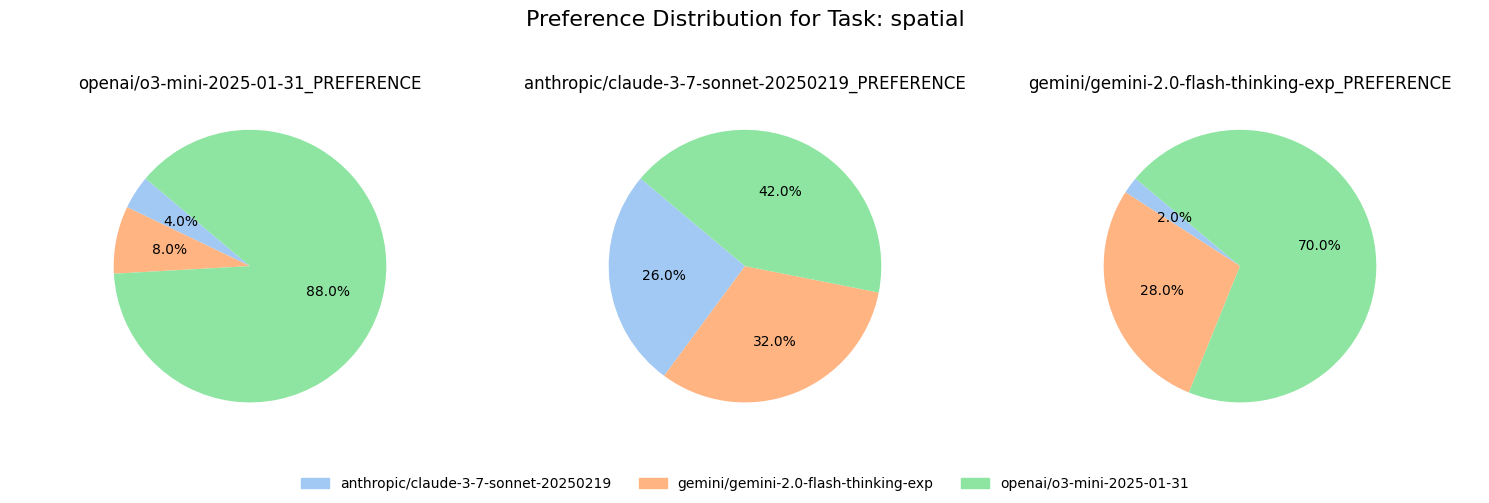

category: math ['math_comp' 'olympiad' 'AMPS_Hard']


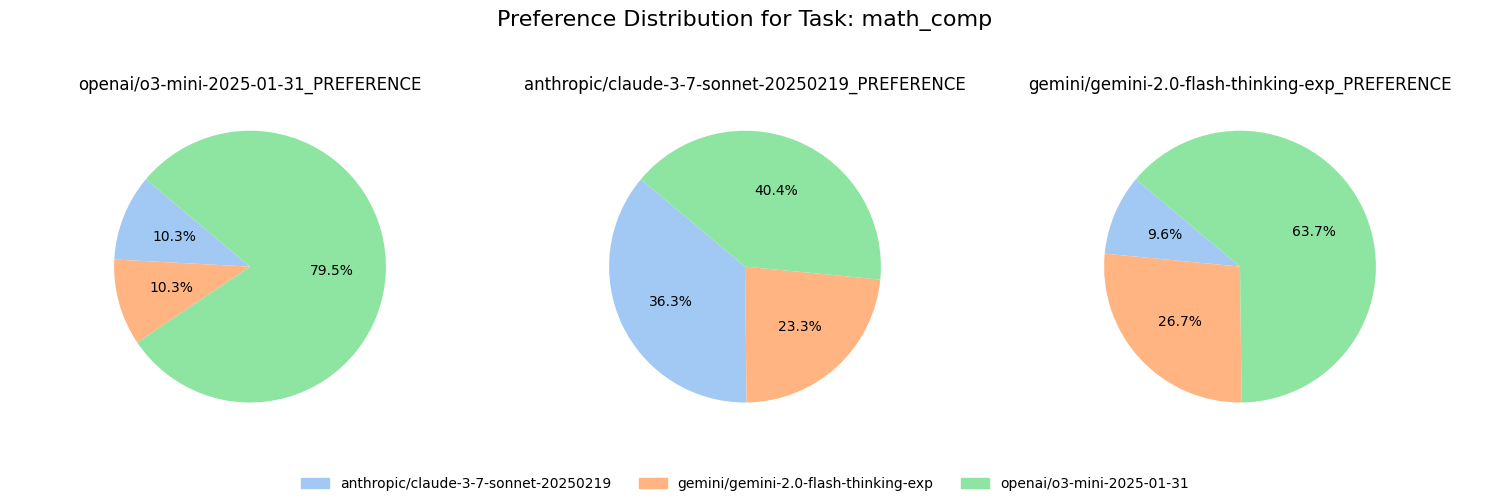

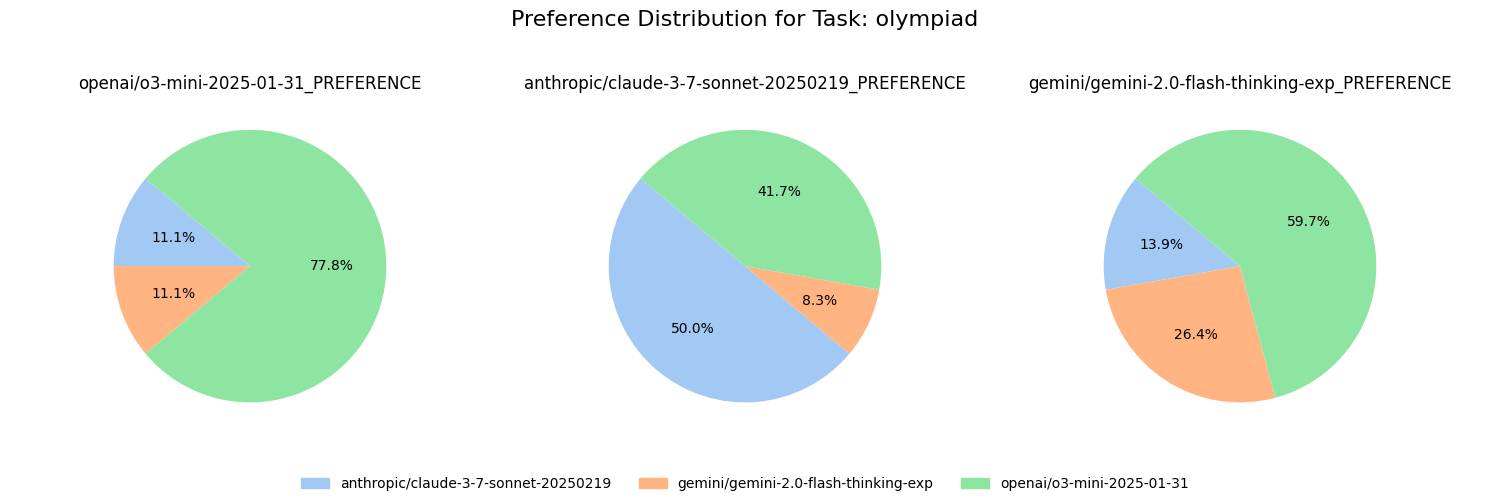

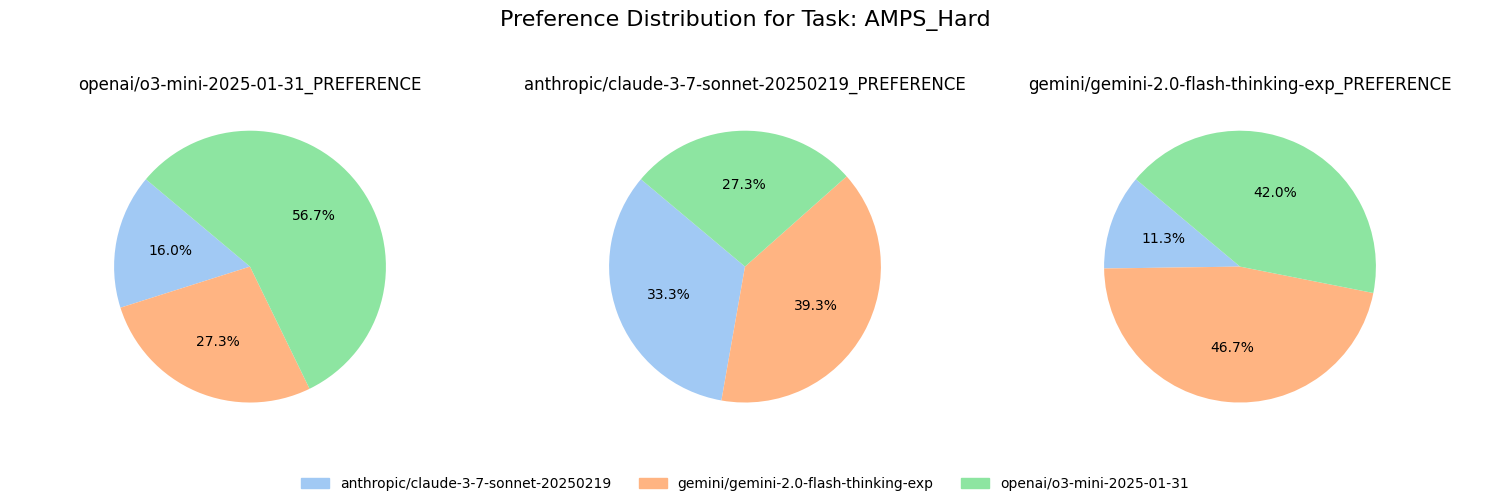

In [6]:
for category in config["livebench"].keys():
    file_path = config["livebench"][category]["judgement_path"]
    df = df = pd.read_csv(file_path)
    print('category:', category, df['task'].unique())
    # print(f'category: {category}, tasks: {set(df['task'])}')
    plot_pref_dist_per_task(df, category, dataset_name="LiveBench")

### Plot majority voting

In [7]:
# def majority_vote(row, tiebreaking_judge, responder_list):
#     def get_tiebreaker_vote(question, responses):
#         print('Tie breaker Judge called.')
#         preference = tiebreaking_judge.get_preference(question, responses)
#         preference = responder_list[int(preference)]
#         print('tiebreaker decision:', preference)
#         return preference

#     pref_cols = [col for col in row.keys() if col.endswith("_PREFERENCE")]
#     # Get the votes from all preference columns as a list.
#     votes = row[pref_cols].tolist()
#     vote_counts = Counter(votes)
    
#     # Calculate the threshold: a candidate must receive more than half of the votes.
#     required_votes = len(votes) // 2 + 1
    
#     # Check if any candidate meets or exceeds the required votes.
#     for candidate, count in vote_counts.items():
#         if count >= required_votes:
#             return candidate
    
#     # If no candidate has the required majority, call the tie-breaker.
#     print(f'Result was {vote_counts}')
#     return get_tiebreaker_vote(row["question"], row[votes])

In [8]:
# def plot_majority_vote_with_tiebreaker(df, category, dataset_name):
#     # Compute the counts of each preference value.
#     value_counts = df["majority_vote"].value_counts(dropna=False)

#     # Sort the categories for consistent ordering.
#     sorted_categories = sorted(value_counts.index, key=lambda x: str(x))

#     # Create a pastel color palette matching the number of unique categories.
#     palette = sns.color_palette("pastel", n_colors=len(sorted_categories))
#     # Map each category to a specific color.
#     cat_to_color = dict(zip(sorted_categories, palette))
#     # Create a list of colors corresponding to the sorted categories.
#     slice_colors = [cat_to_color[cat] for cat in sorted_categories]

#     # Plot the pie chart.
#     plt.figure(figsize=(6, 6))
#     plt.pie(
#         value_counts.loc[sorted_categories],
#         labels=None, # Do not display individual labels on the pie slices.
#         autopct='%1.1f%%',
#         startangle=140,
#         colors=slice_colors)
#     # 6. Create a common legend using patches.
#     patches = [mpatches.Patch(color=cat_to_color[cat], label=str(cat)) for cat in sorted_categories]
#     # Place the legend at the bottom center of the figure.
#     plt.legend(handles=patches, loc='lower center', ncol=len(patches), frameon=False, fontsize=14)

#     plt.title(f"Majority Voting - {category}", fontsize=16)
#     plt.axis('equal')  # Draw the pie as a circle.
#     plt.tight_layout()
#     plt.savefig(f'results/plots/{dataset_name}_majority_voting_{category}.png')
#     plt.show()

In [9]:
for category in config["livebench"].keys():
    print('\ncategory:', category)
    df_path = config["livebench"][category]["judgement_path"]
    save_path = os.path.join('results/LiveBench/voting', df_path.split('/')[-1])

    df = pd.read_csv(df_path)
    pref_cols = [col for col in df.columns if col.endswith("_PREFERENCE")]
    tiebreaking_judge = Judge(config["tiebreaker_judge"])
    responder_list = config["livebench"][category]["llms"]
    df["majority_vote"] = df.apply(lambda row: majority_vote(row, tiebreaking_judge, responder_list), axis=1)
    df.to_csv(save_path, index=False)


category: instruction_following
Result was Counter({'openai/o3-mini-2025-01-31': 1, 'anthropic/claude-3-7-sonnet-20250219': 1, 'gemini/gemini-2.0-flash': 1})
Tie breaker Judge called.
tiebreaker decision: gemini/gemini-2.0-flash
Result was Counter({'openai/o3-mini-2025-01-31': 1, 'anthropic/claude-3-7-sonnet-20250219': 1, 'gemini/gemini-2.0-flash': 1})
Tie breaker Judge called.
tiebreaker decision: openai/o3-mini-2025-01-31
Result was Counter({'openai/o3-mini-2025-01-31': 1, 'gemini/gemini-2.0-flash': 1, 'anthropic/claude-3-7-sonnet-20250219': 1})
Tie breaker Judge called.
tiebreaker decision: openai/o3-mini-2025-01-31
Result was Counter({'openai/o3-mini-2025-01-31': 1, 'anthropic/claude-3-7-sonnet-20250219': 1, 'gemini/gemini-2.0-flash': 1})
Tie breaker Judge called.
tiebreaker decision: openai/o3-mini-2025-01-31
Result was Counter({'gemini/gemini-2.0-flash': 1, 'openai/o3-mini-2025-01-31': 1, 'anthropic/claude-3-7-sonnet-20250219': 1})
Tie breaker Judge called.
tiebreaker decision: 